<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/11_Intrinsic_dimension_of_the_fish_measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dimension reduction and Intrinsic dimension of the fish measurements**

In machine learning, the intrinsic dimension for a data set is the number of variables needed in a minimal representation of the data. It is the number of variables needed to generate a good approximation of the data.

For a data set of N variables, its intrinsic dimension M satisfies 0 ≤ M ≤ N.

The fish measurement dataset was sourced from the Journal of Statistics Education. 

http://jse.amstat.org/jse_data_archive.htm

**The Fish Dataset**

159 fishes of 7 species are caught and measured. Altogether there are
8 variables.  All the fishes are caught from the same lake
(Laengelmavesi) near Tampere in Finland.



**VARIABLE DESCRIPTIONS**

1  Obs:       Observation number ranges from 1 to 159

2  Species   (Numeric)

        Code Finnish  Swedish    English        Latin      
         1   Lahna    Braxen     Bream          Abramis brama
         2   Siika    Iiden      Whitewish      Leusiscus idus
         3   Saerki   Moerten    Roach          Leuciscus rutilus
         4   Parkki   Bjoerknan  ?              Abramis bjrkna
         5   Norssi   Norssen    Smelt          Osmerus eperlanus
         6   Hauki    Jaedda     Pike           Esox lucius
         7   Ahven    Abborre    Perch          Perca fluviatilis

3  Weight:      Weight of the fish (in grams)

4  Length1:     Length from the nose to the beginning of the tail (in cm)

5  Length2:     Length from the nose to the notch of the tail (in cm)

6  Length3:     Length from the nose to the end of the tail (in cm)

7  Height%:     Maximal height as % of Length3

8  Width%:      Maximal width as % of Length3

9  Sex:         1 = male 0 = female



          ___/////___                  _
         /           \    ___          |
       /\             \_ /  /          H
     <   )            __)  \           |
       \/_\\_________/   \__\          _

     |------- L1 -------|
     |------- L2 ----------|
     |------- L3 ------------|


The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, we need to standardize these features first. 

Here, we build a pipeline to standardize and cluster the data.

In [0]:
# Download the seeds data using wget (Linux)
!wget http://jse.amstat.org/datasets/fishcatch.dat.txt

--2020-01-03 16:53:31--  http://jse.amstat.org/datasets/fishcatch.dat.txt
Resolving jse.amstat.org (jse.amstat.org)... 107.180.48.28
Connecting to jse.amstat.org (jse.amstat.org)|107.180.48.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10740 (10K) [text/plain]
Saving to: ‘fishcatch.dat.txt.1’

fishcatch.dat.txt.1 100%[===================>]  10.49K  --.-KB/s    in 0s      

2020-01-03 16:53:31 (289 MB/s) - ‘fishcatch.dat.txt.1’ saved [10740/10740]



Import NumPy and Pandas

In [0]:
import numpy as np
import pandas as pd

Load the dataset to an array 'samples' containing the measurements (such as area, perimeter, length, and several others) of samples of grain.

In [0]:
data = np.genfromtxt('fishcatch.dat.txt')

In [0]:
# Test the dataload for the seeds dataset
samples = data[:,2:-2][~np.isnan(data).any(axis=1)]
samples

array([[ 600. ,   29.4,   32. ,   37.2,   40.2],
       [ 700. ,   30.4,   33. ,   38.3,   38.8],
       [ 575. ,   31.3,   34. ,   39.5,   38.3],
       [ 725. ,   31.8,   35. ,   40.9,   40. ],
       [1000. ,   33.5,   37. ,   42.6,   44.5],
       [ 920. ,   35. ,   38.5,   44.1,   40.9],
       [ 925. ,   36.2,   39.5,   45.3,   41.4],
       [ 975. ,   37.4,   41. ,   45.9,   40.6],
       [ 800. ,   33.7,   36.4,   39.6,   29.7],
       [ 110. ,   19.1,   20.8,   23.1,   26.7],
       [ 120. ,   19.4,   21. ,   23.7,   25.8],
       [ 150. ,   20.4,   22. ,   24.7,   23.5],
       [ 145. ,   20.5,   22. ,   24.3,   27.3],
       [ 160. ,   20.5,   22.5,   25.3,   27.8],
       [ 160. ,   21.1,   22.5,   25. ,   25.6],
       [ 200. ,   22.1,   23.5,   26.8,   27.6],
       [ 272. ,   25. ,   27. ,   30.6,   28. ],
       [  60. ,   14.3,   15.5,   17.4,   37.8],
       [  90. ,   16.3,   17.7,   19.8,   37.4],
       [ 120. ,   17.5,   19. ,   21.3,   39.4],
       [ 170. ,   19

In [0]:
labels = data[:,1]
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7.])

In [0]:
np.species = np.where(labels==1, 'Bream', np.where(labels==2, 'Whitewish', np.where(labels==3, 'Roach', 
                      np.where(labels==4, 'Abramis', np.where(labels==5, 'Smelt', np.where(labels==6, 'Pike', np.where(labels==7, 'Abborre', labels)))))))

np.species

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Whitewish', 'Whitewish', 'Whitewish', 'Whitewish', 'Whitewish',
       'Whitewish', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Abramis', 'Abramis', 'Abramis', 'Abramis', 'Abramis', 'Abramis',
       'Abramis', 'Abramis', 'Abramis', 'Abramis', 'Abramis', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Pike',
       'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike',
       'Pi

Import the StandardScaler from sklearn.preprocessing, make_pipeline from sklearn.pipeline and KMeans function from sklearn.cluster

In [0]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [0]:
# Create scaler: scaler
scaler = StandardScaler()

In [0]:
# Create a PCA instance: pca
pca = PCA()

In [0]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)


In [0]:
# Fit the pipeline to 'samples'
pipeline.fit(samples)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

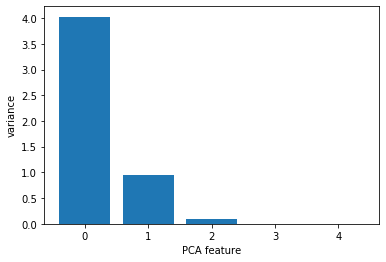

In [0]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Now, we use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [0]:
# Import PCA
from sklearn.decomposition import PCA

In [0]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

In [0]:
# Fit the PCA instance to the samples
pca.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# Transform the scaled samples: pca_features
pca_features = pca.transform(samples)

In [0]:
# Print the shape of pca_features
print(pca_features.shape)

(71, 2)
